In [55]:
#import pandas
#pandas.read_csv(r"C:\Users\Yoko\Dropbox\HWRS 519 Fund Surface Water Hydr DB\HW\HW#6\HW#6.txt")

['Sand', 'Loamy sand', 'Sandy loam', 'Silt loam', 'Loam', 'Clay loam', 'Sandy clay', 'Silty clay', 'Clay']


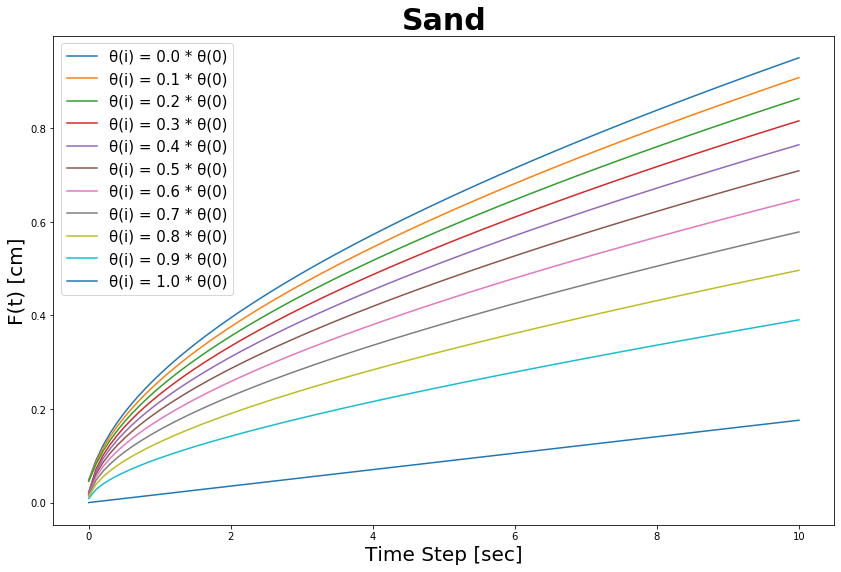

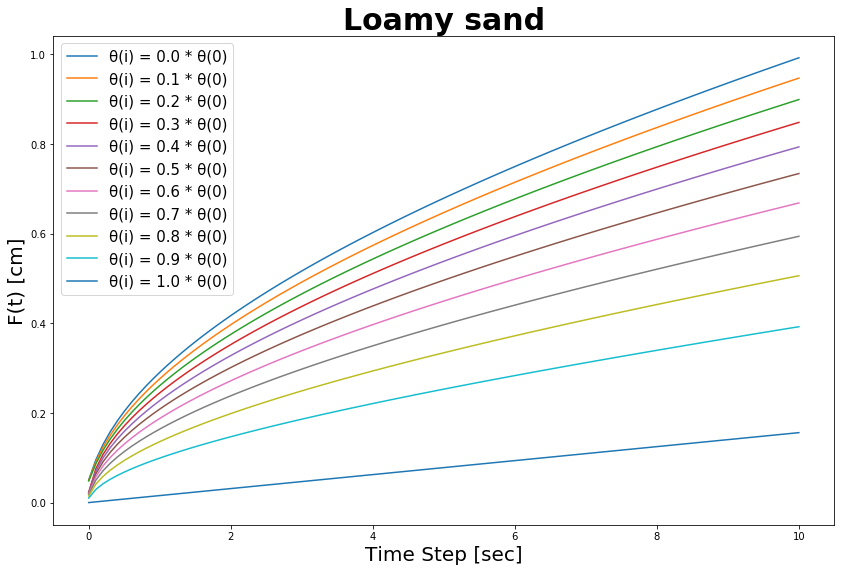

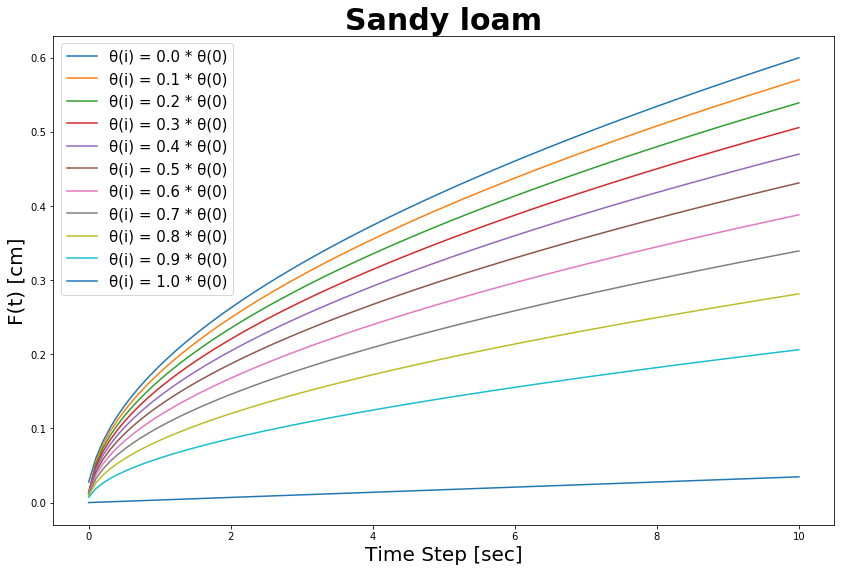

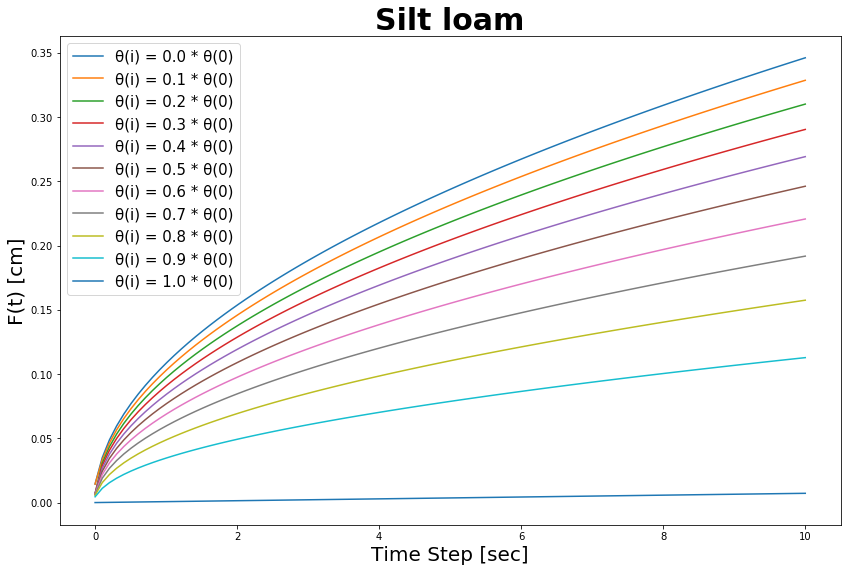

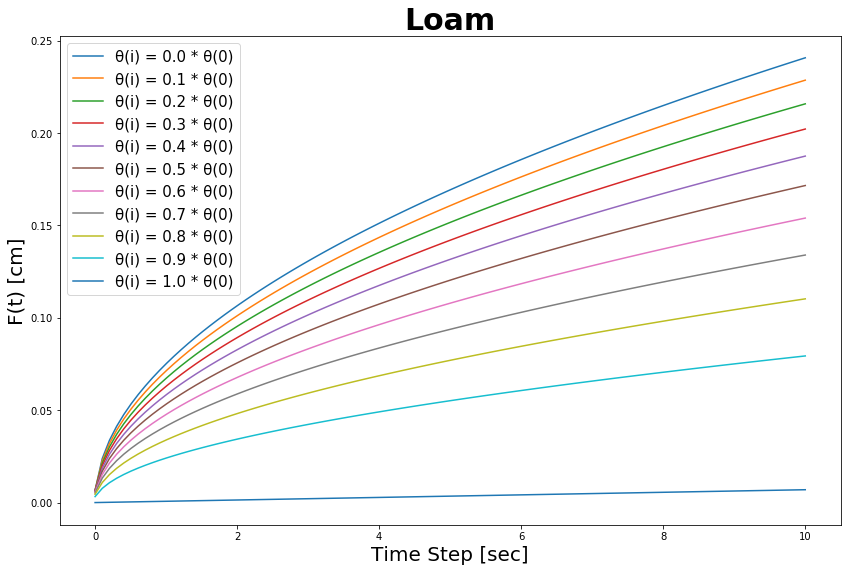

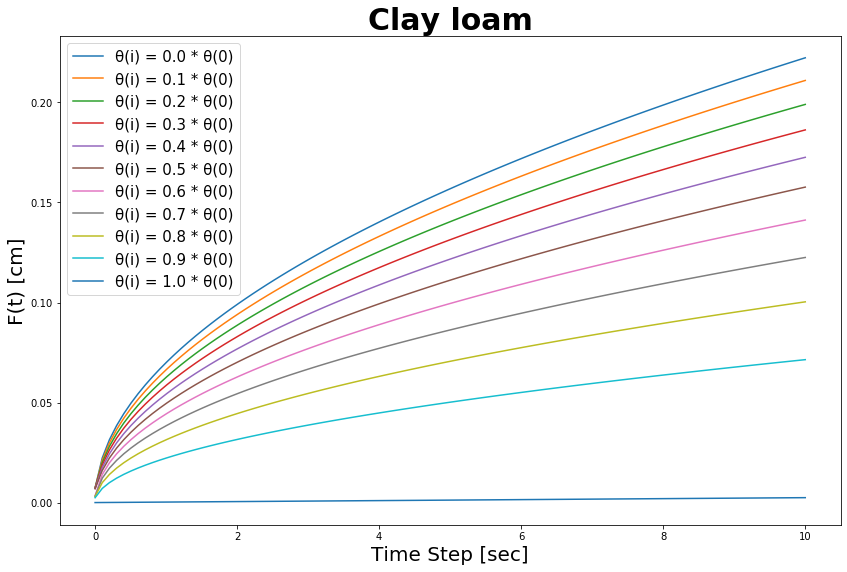

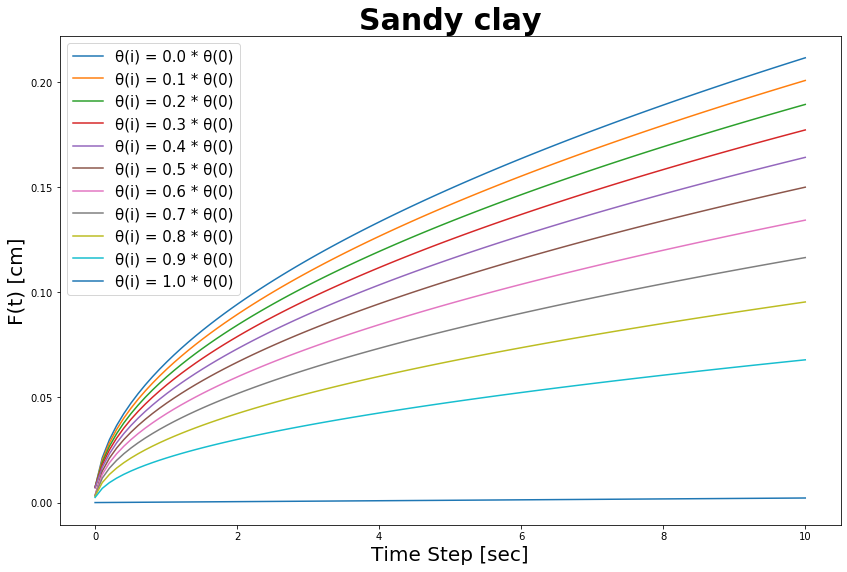

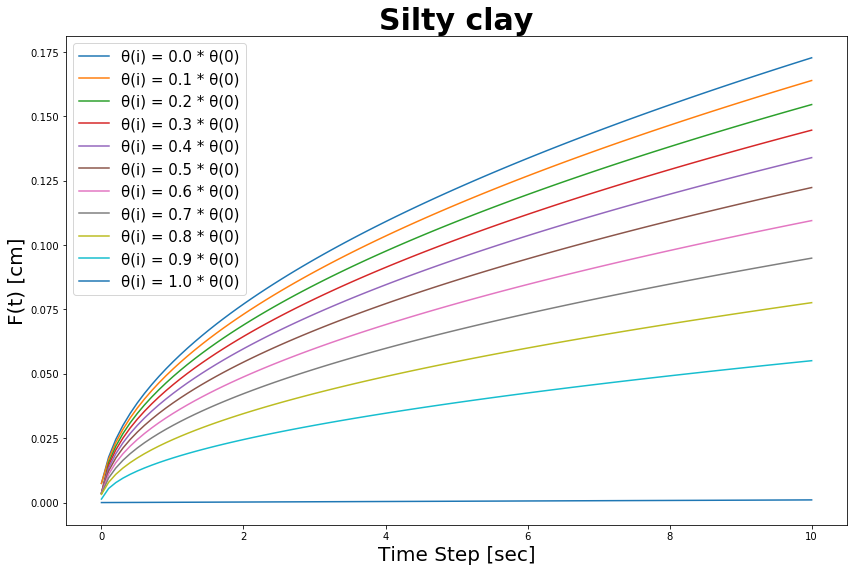

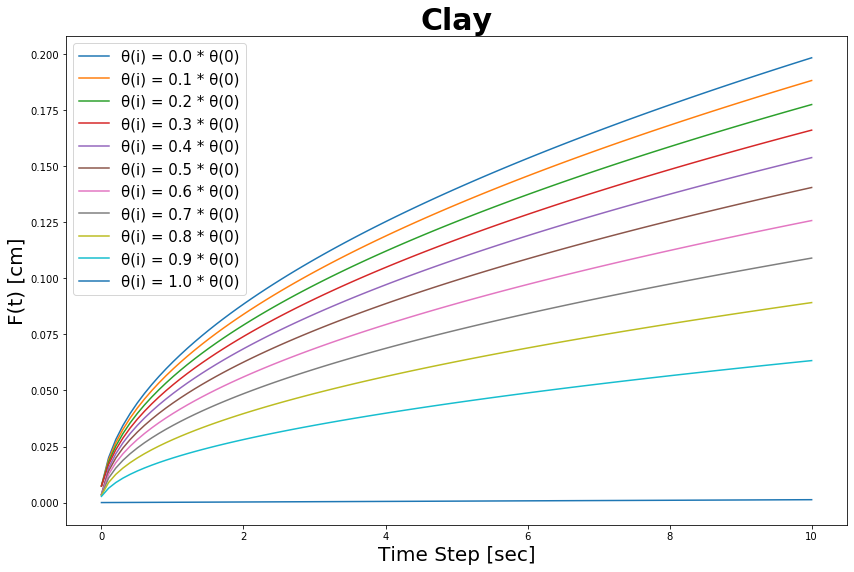

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

#{"Soil texture": [Porosity, Ks[cm.s-1], Hb[cm], b, |yf|[cm]]}
soil = {'Sand': [0.395, 1.76e-2, 12.1, 4.05, 4.95],
        'Loamy sand': [0.41, 1.56e-2, 9, 4.38, 6.13],
        'Sandy loam': [0.435, 3.47e-3, 21.8, 4.9, 11.01],
        'Silt loam': [0.485, 7.20e-4, 78.6, 5.3, 16.68],
        'Loam': [0.451, 6.95e-4, 47.8, 5.39, 8.89],
        'Clay loam': [0.476, 2.45e-4, 63, 8.52, 20.88],
        'Sandy clay': [0.426, 2.17e-4, 15.3, 10.4, 23.9],
        'Silty clay': [0.492, 1.03e-4, 49, 10.4, 29.22],
        'Clay': [0.482, 1.28e-4, 40.5, 11.4, 31.63]}

soil_types = ['Sand', 'Loamy sand', 'Sandy loam', 'Silt loam', 'Loam', 'Clay loam', 'Sandy clay', 'Silty clay', 'Clay']

#print(soil)
print(soil_types)

def func(F, t, Ks, P):
    return Ks*t + P*np.log(1 + F/P) - F

def dfunc(F, t, Ks, P):
#   return np.power(1 + F/P, -1) - 1
    return 1/(1 + F/P) - 1


theta_i_per = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
t = np.linspace(0, 10, 100, endpoint=True)
F = {}

for soil_type in soil_types:
    plt.figure(figsize=(14,9))
    theta_0, Ks, Hb, b, psyf = soil[soil_type]
#    print(soil[soil_type][1])
    F[soil_type] = []
    for i in range(len(theta_i_per)): 
        P = psyf*(theta_0 - theta_0*theta_i_per[i])
#         print(P, theta_0, theta_i_per)
#         input()
        tol = 1e-10
        max_diff = tol + 1
        x_last = np.ones(100)
        while max_diff > tol: 
            x_next = x_last - func(x_last, t, Ks, P)/dfunc(x_last, t, Ks, P)
            max_diff = np.abs(np.max(x_next - x_last))
            x_last = x_next
#             print(x_last, "\n", func(x_last, t, Ks, P), "\n", dfunc(x_last, t, Ks, P))
#             input()
        F[soil_type].append(x_next)
        plt.plot(t,F[soil_type][i], markersize=4, linestyle = '-', label = 'θ(i) = %s * θ(0)'%(i/10))
    plt.plot(t,soil[soil_type][1]*t, markersize=4, linestyle = '-', label = 'θ(i) = 1.0 * θ(0)')
    plt.xlabel('Time Step [sec]',fontsize = 20)
    plt.ylabel('F(t) [cm]',fontsize = 20)
    plt.title(soil_type, fontsize = 30, fontweight = 'bold')
    plt.legend(prop={"size":15})
    plt.show()

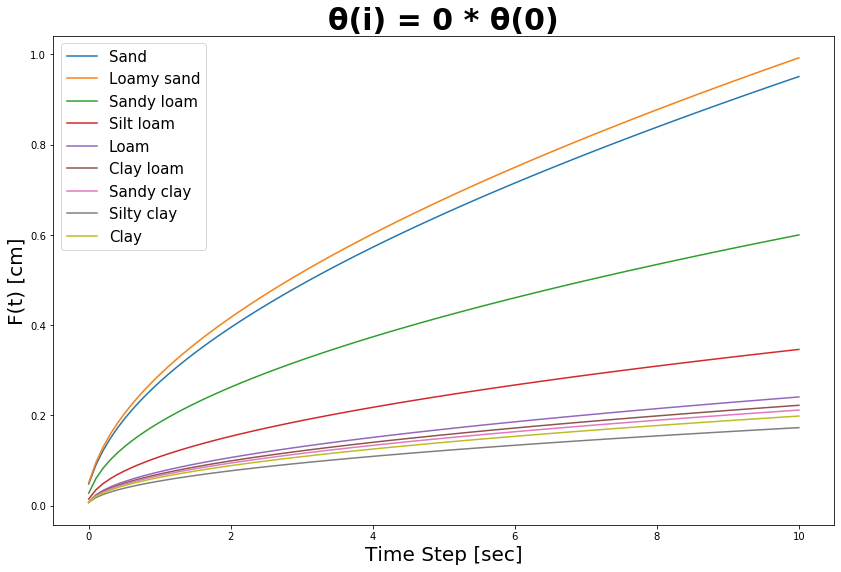

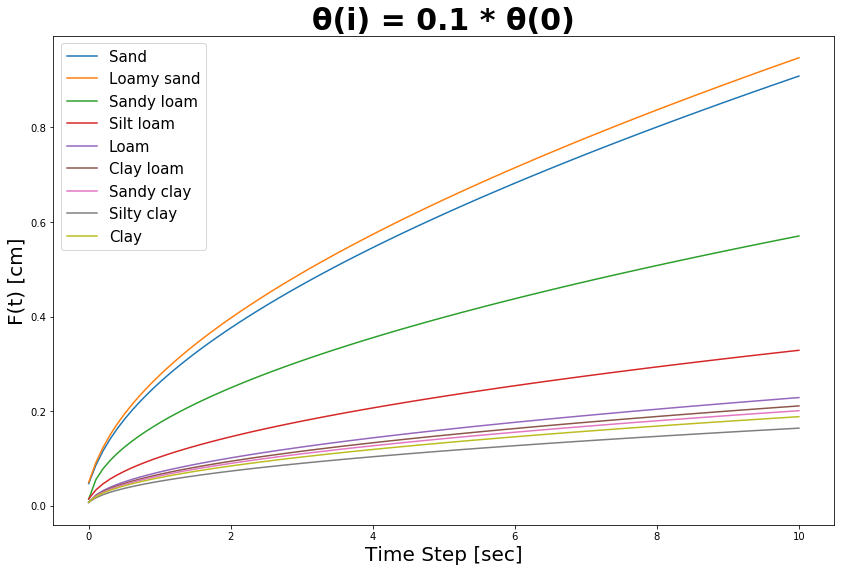

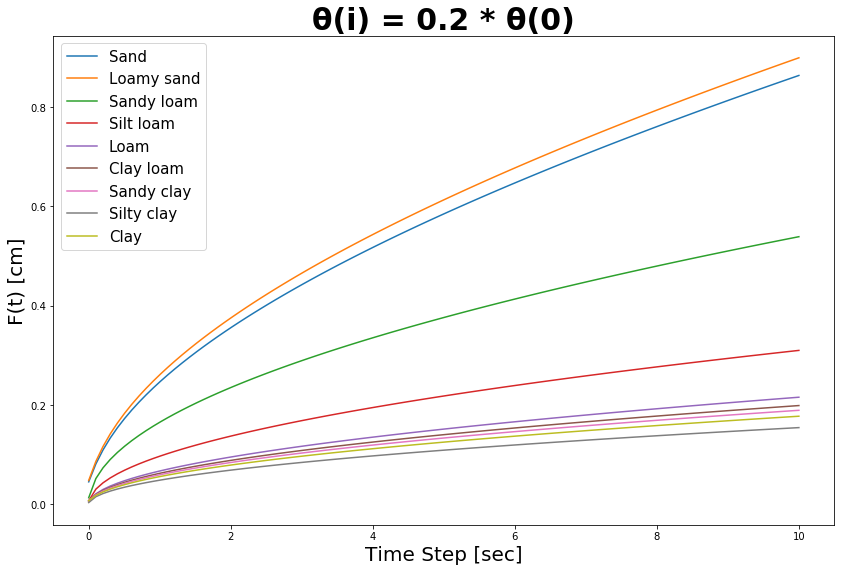

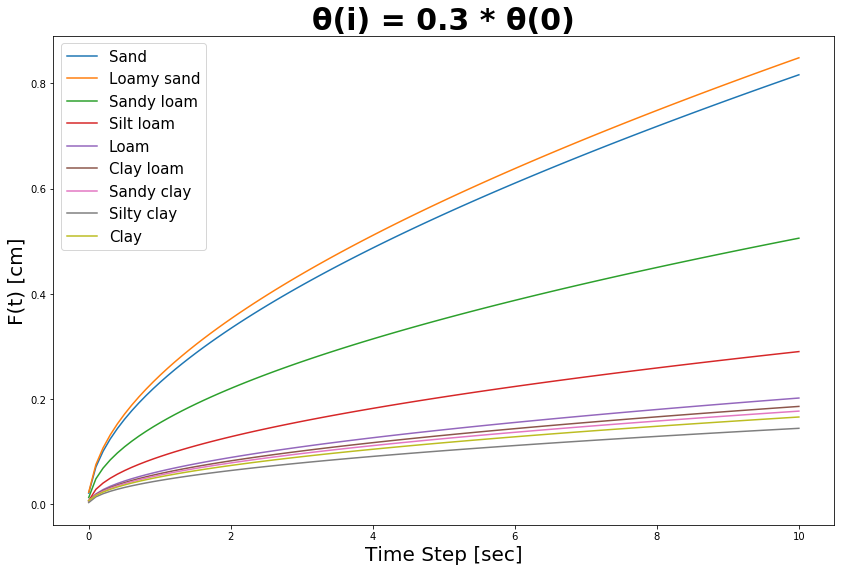

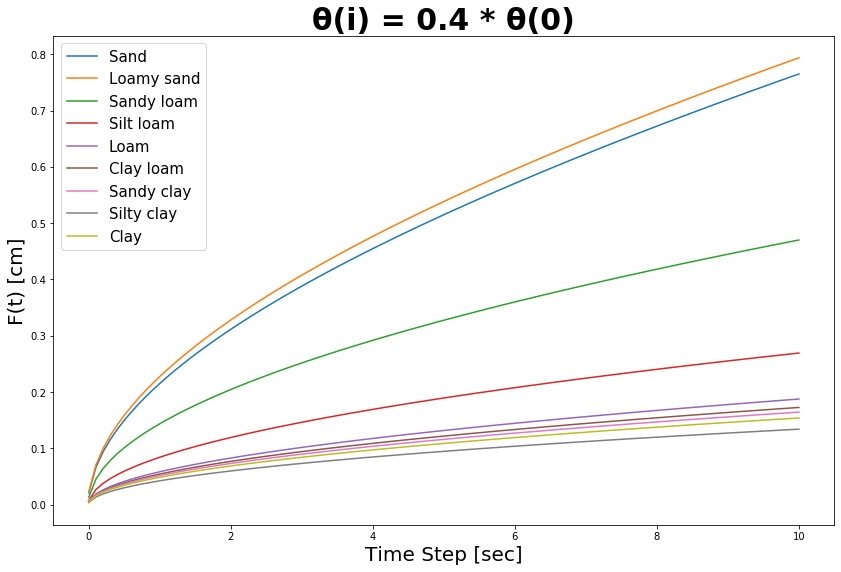

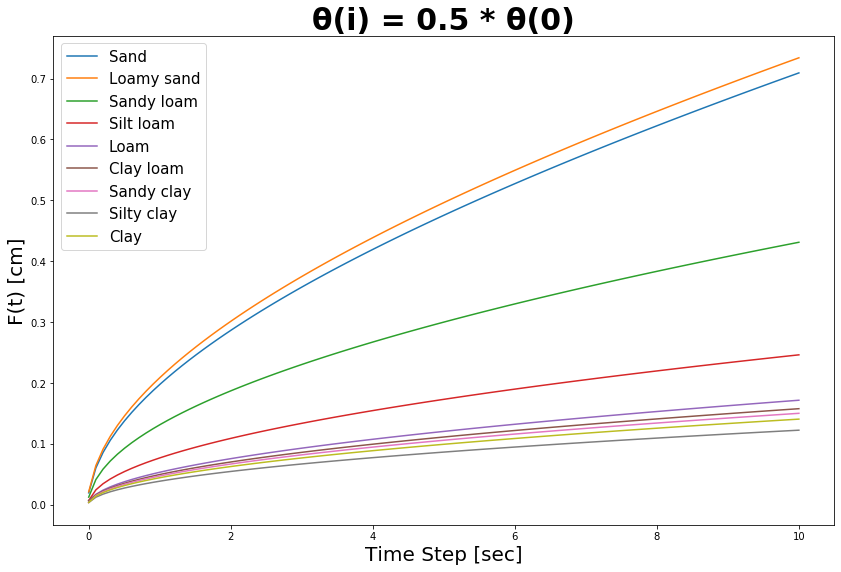

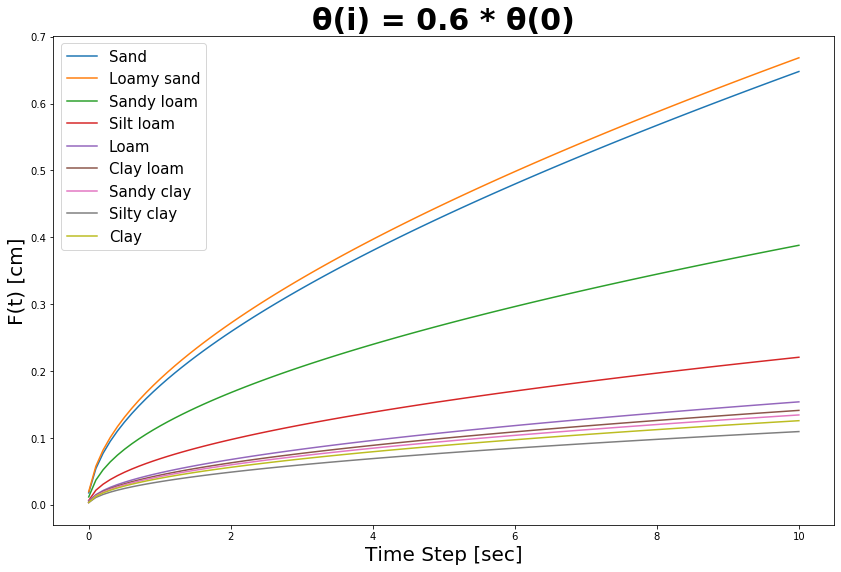

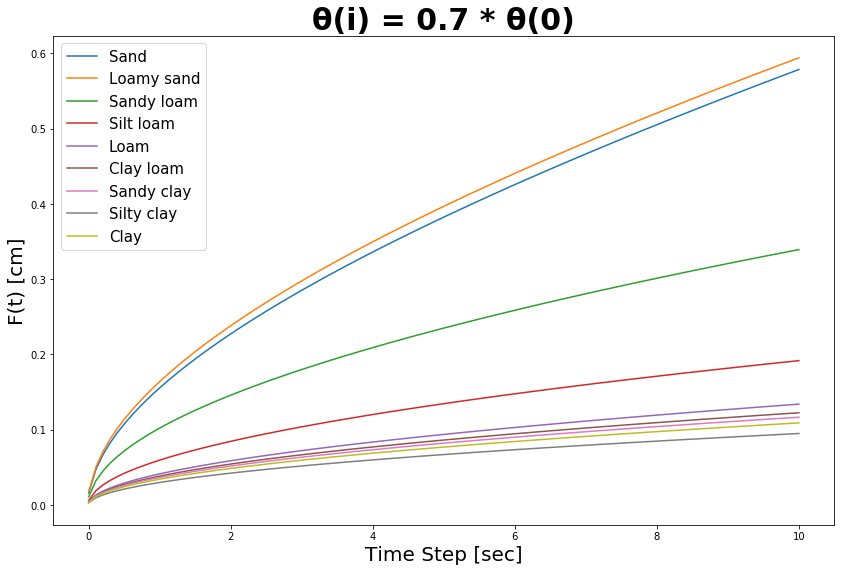

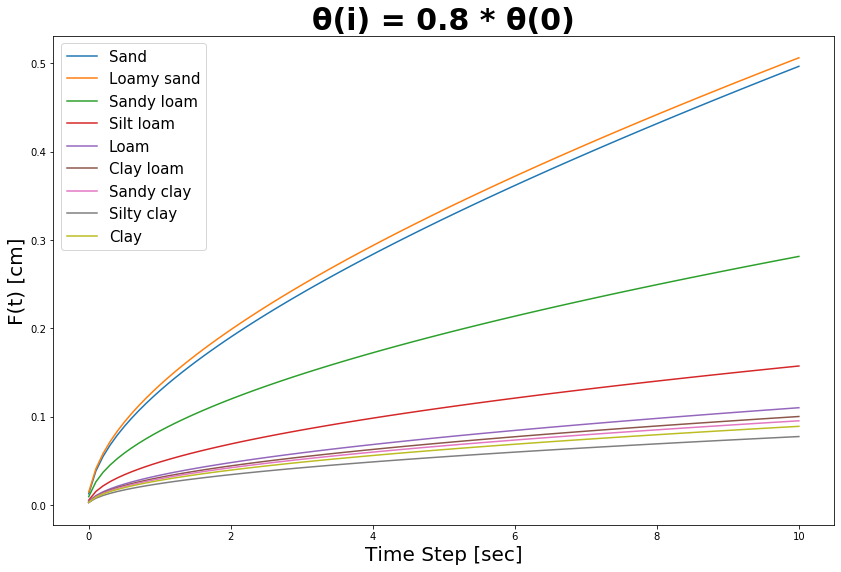

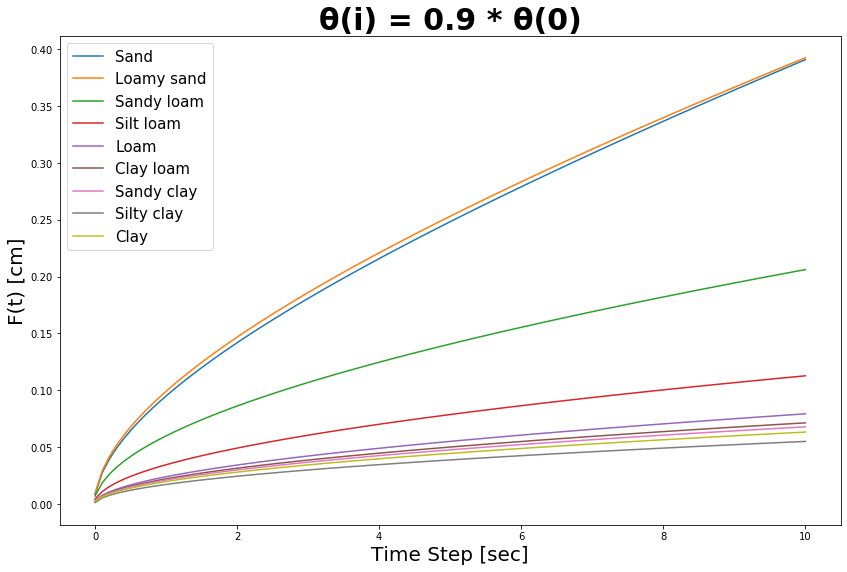

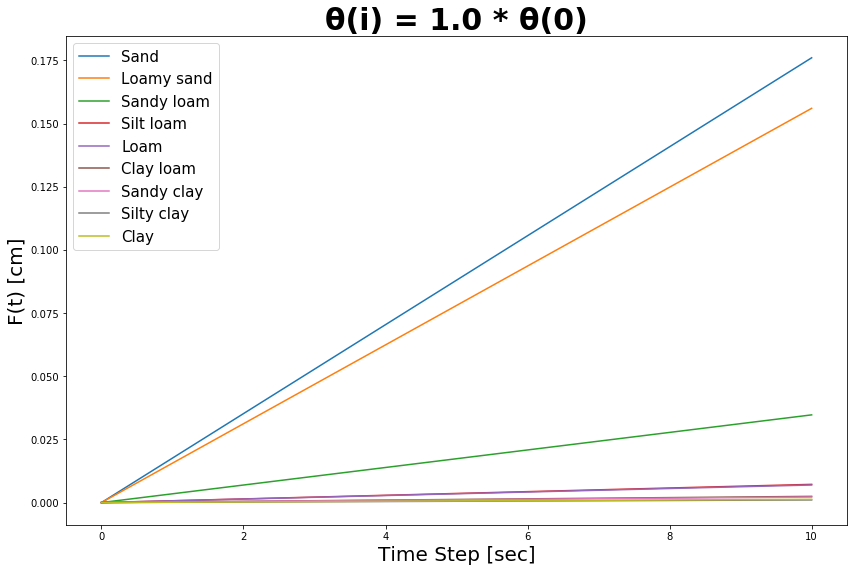

In [63]:
#print(F, "\n", "\n")

#print(F["Sand"][1], "\n", "\n")
#print(F["Loamy sand"][1], "\n", "\n")

#for i in range(len(theta_i_per)):
#    print("\n", "\n", "\n")
#    for soil_type in soil_types:
#        print(F[soil_type][i], "\n")

#print(soil["Sand"][1])

for i in range(len(theta_i_per)):
    plt.figure(figsize=(14,9))
    for soil_type in soil_types:
        plt.plot(t,F[soil_type][i], markersize=4, linestyle = '-', label = '%s'%(soil_type))
    plt.xlabel('Time Step [sec]',fontsize = 20)
    plt.ylabel('F(t) [cm]',fontsize = 20)
    plt.title('θ(i) = %s * θ(0)'%(theta_i_per[i]), fontsize = 30, fontweight = 'bold')
    plt.legend(prop={"size":15})
    plt.show()

plt.figure(figsize=(14,9))
for soil_type in soil_types:
    plt.plot(t,soil[soil_type][1]*t, markersize=4, linestyle = '-', label = '%s'%(soil_type))
plt.xlabel('Time Step [sec]',fontsize = 20)
plt.ylabel('F(t) [cm]',fontsize = 20)
plt.title('θ(i) = 1.0 * θ(0)', fontsize = 30, fontweight = 'bold')
plt.legend(prop={"size":15})
plt.show()